In [52]:
import pandas as pd
import numpy as np

data = pd.read_csv(r"F:\M.Tech_CollgeMaterials\IronCode\PredictingWildfire\dataset\California Wildfire Damage.csv")

In [53]:
data.head(1)

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning


In [54]:
data = data.drop(['Incident_ID'],axis=1)
data = data.drop(['Date'],axis=1)

In [55]:
data.head(5)

,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause
0,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning
1,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning
2,Shasta County,26394,915,291,31,50,6,2421.96,Human Activity
3,Sonoma County,20004,1220,128,34,28,0,3964.16,Unknown
4,Sonoma County,40320,794,469,147,0,15,1800.09,Unknown


In [56]:
unique_locations = data['Location'].unique()
print(unique_locations)


['Sonoma County' 'Shasta County' 'Butte County' 'San Diego County'
 'Napa Valley' 'Riverside County' 'Santa Barbara County'
 'Los Angeles County' 'Mendocino County' 'Orange County']


In [57]:
data['Cause'].unique()


array(['Lightning', 'Human Activity', 'Unknown'], dtype=object)

In [58]:
# Creating dictionary for locations mapping .
location_mapping = {
    'Sonoma County': 0,
    'Shasta County': 1,
    'Butte County': 2,
    'San Diego County': 3,
    'Napa Valley': 4,
    'Riverside County': 5,
    'Santa Barbara County': 6,
    'Los Angeles County': 7,
    'Mendocino County': 8,
    'Orange County': 9
}

data['Location'] = data['Location'].map(location_mapping)



In [59]:
data.head(3)

,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause
0,0,14048,763,474,235,70,19,2270.57,Lightning
1,0,33667,1633,4,263,100,2,1381.14,Lightning
2,1,26394,915,291,31,50,6,2421.96,Human Activity


In [60]:
data.isnull().sum()

Location                                0
Area_Burned (Acres)                     0
Homes_Destroyed                         0
Businesses_Destroyed                    0
Vehicles_Damaged                        0
Injuries                                0
Fatalities                              0
Estimated_Financial_Loss (Million $)    0
Cause                                   0
dtype: int64

In [61]:
data['Cause'] = data['Cause'].map({"Lightning": 0, "Human Activity": 1, "Unknown": 2})


In [62]:
data.head(5)

,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause
0,0,14048,763,474,235,70,19,2270.57,0
1,0,33667,1633,4,263,100,2,1381.14,0
2,1,26394,915,291,31,50,6,2421.96,1
3,0,20004,1220,128,34,28,0,3964.16,2
4,0,40320,794,469,147,0,15,1800.09,2


In [63]:
from sklearn.model_selection import train_test_split

X = data.drop(["Cause"],axis=1)
y = data["Cause"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 30.0
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.17      0.17         6
           1       0.50      0.38      0.43         8
           2       0.25      0.33      0.29         6

    accuracy                           0.30        20
   macro avg       0.31      0.29      0.29        20
weighted avg       0.33      0.30      0.31        20



In [71]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy*100}")


Accuracy: 45.0


In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {accuracy*100}")

Accuracy: 45.0


C:\Users\sayed\AppData\Local\Temp\ipykernel_15828\178221519.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Cause', palette='viridis')


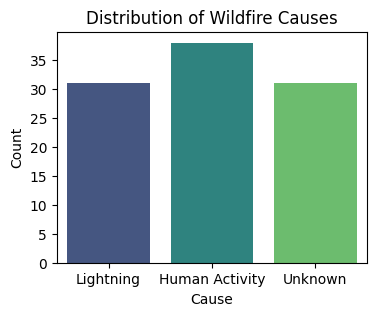

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4, 3))
sns.countplot(data=data, x='Cause', palette='viridis')
plt.title('Distribution of Wildfire Causes')
plt.xlabel('Cause')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Lightning', 'Human Activity', 'Unknown'])
plt.show()
